<a href="https://colab.research.google.com/github/tfindiamooc/mlp/blob/main/MLPTextAnalysisClass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson #3c: Text Classification with Random Forest - Ensemble Power!

Welcome to another exciting lesson focused on **Random Forest** classifiers for text classification!  We've explored linear models (Logistic Regression) and probabilistic models (Naive Bayes). Now, let's dive into **ensemble methods** and discover the power of Random Forests.

In this lesson, you will:

*   Build **Random Forest pipelines** for text classification.
*   Understand **what Random Forests are and how they work as ensemble methods**.
*   Explore the **strengths of Random Forests** for text data.
*   Experiment with **different vectorizers** with Random Forests.
*   Learn how to **inspect** a Random Forest model using **feature importances**.
*   Use **GridSearchCV** to **tune hyperparameters** of Random Forests.

Let's begin by building a basic Random Forest pipeline and see how it performs!

In [ ]:
# Code Cell 1: Basic Random Forest Pipeline Code
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create Random Forest Pipeline
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('rf', RandomForestClassifier(random_state=42)) # Step 2: RandomForestClassifier
])

# 4. Train Pipeline
rf_pipeline.fit(X_train, y_train)

# 5. Make Predictions
y_pred_rf_pipeline = rf_pipeline.predict(X_test)

# 6. Evaluate Performance
print("Random Forest Pipeline Classification Report:")
print(classification_report(y_test, y_pred_rf_pipeline, target_names=target_names))

Random Forest Pipeline Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.96      0.98       235
soc.religion.christian       0.97      1.00      0.99       304

              accuracy                           0.98       539
             macro avg       0.99      0.98      0.98       539
          weighted avg       0.98      0.98      0.98       539



### Random Forest Pipeline - First Look

This code sets up a basic Random Forest pipeline for text classification. Let's break down the key components:

1.  **Dataset Loading and Splitting:**  We continue to use the 20 Newsgroups dataset and split it into training and testing sets.
2.  **Pipeline Creation:**  We create a scikit-learn pipeline:
    *   **`TfidfVectorizer`:**  For text vectorization using TF-IDF (we're using TF-IDF as a starting point, but we'll experiment with other vectorizers later).
    *   **`RandomForestClassifier`:** This is the Random Forest classifier model.
        *   `random_state=42`:  Setting `random_state` ensures reproducibility. Random Forests have randomness in their training, so setting this makes sure you get the same results each time you run the code.
3.  **Pipeline Training:** We train the pipeline on the training data using `rf_pipeline.fit`.
4.  **Prediction and Evaluation:** We make predictions on the test set and evaluate the performance using `classification_report`.

Run this code to see the classification report for a basic Random Forest pipeline. How does its performance compare to Logistic Regression and Naive Bayes from the previous lessons (using their default settings)?

Now, let's understand what Random Forests are and why they are powerful classifiers.

### What is a Random Forest? - Ensemble of Trees

Random Forest is a powerful **ensemble learning** method.  It's called a "forest" because it's made up of many "decision trees". Let's understand the key ideas behind Random Forests:

*   **Decision Trees as Building Blocks:**
    *   Imagine a single decision tree classifier. It makes decisions by asking a series of questions about the features (words in our case) to classify a document.
    *   Decision trees can be prone to **overfitting**, especially if they are very deep (complex). They can learn the training data too well, including noise, and may not generalize well to unseen data.

*   **Ensemble of Decision Trees:**  Random Forest overcomes the limitations of single decision trees by creating an **ensemble** (collection) of many decision trees.  Typically, a Random Forest can contain hundreds or thousands of trees.

*   **Bagging (Bootstrap Aggregating):**
    *   Random Forests use a technique called **bagging**.
    *   **For each tree in the forest:**
        *   A **random subset of the training data** is selected with replacement (bootstrapping). This means some data points might be selected multiple times, and some might not be selected at all for a particular tree.
        *   A decision tree is trained on this random subset of data.
    *   This **random sampling of data** for each tree helps to make the trees in the forest diverse.

*   **Random Feature Subspace (Feature Randomness):**
    *   In addition to bagging, Random Forests introduce more randomness through **feature subspace sampling**.
    *   **When splitting a node in a decision tree:**
        *   Instead of considering all features (all words) to find the best split, Random Forest only considers a **random subset of features**.
        *   This further decorrelates the trees in the forest and reduces variance.

*   **Majority Voting (for Classification):**
    *   When making a prediction for a new document, **each tree in the Random Forest makes its own prediction**.
    *   For classification, the Random Forest predicts the class that gets the **majority vote** from all the trees in the forest.

**Why are Random Forests powerful?**

*   **Reduced Overfitting:** By averaging predictions from many diverse trees, Random Forests significantly reduce overfitting compared to single decision trees.
*   **Improved Generalization:** Ensemble methods like Random Forests often generalize better to unseen data and achieve higher accuracy than individual models.
*   **Robust to Outliers:** Random Forests are generally more robust to outliers and noisy data.
*   **Feature Importance:** Random Forests provide a way to estimate **feature importance**, which can help us understand which words are most important for classification (we'll explore this later in this lesson).

Let's experiment with different vectorizers with Random Forests to see how they interact.

In [ ]:
# Code Cell 2: Random Forest with different vectorizers (CountVectorizer, TF-IDF)
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Dataset & Split Data (Same as before)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Pipelines with different vectorizers
# Pipeline with CountVectorizer (BoW)
rf_pipeline_bow = Pipeline([
    ('bow', CountVectorizer(stop_words='english', max_features=5000)), # Using CountVectorizer
    ('rf', RandomForestClassifier(random_state=42))
])

# Pipeline with TfidfVectorizer (TF-IDF) - (Same as before for comparison)
rf_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('rf', RandomForestClassifier(random_state=42))
])

# 3. Train Pipelines
rf_pipeline_bow.fit(X_train, y_train)
rf_pipeline_tfidf.fit(X_train, y_train)

# 4. Make Predictions
y_pred_rf_bow = rf_pipeline_bow.predict(X_test)
y_pred_rf_tfidf = rf_pipeline_tfidf.predict(X_test)

# 5. Evaluate Performance - Compare BoW and TF-IDF
print("Random Forest Pipeline with CountVectorizer (BoW) Classification Report:")
print(classification_report(y_test, y_pred_rf_bow, target_names=target_names))

print("\nRandom Forest Pipeline with TfidfVectorizer (TF-IDF) Classification Report:")
print(classification_report(y_test, y_pred_rf_tfidf, target_names=target_names))

Random Forest Pipeline with CountVectorizer (BoW) Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.96      0.98       235
soc.religion.christian       0.97      1.00      0.98       304

              accuracy                           0.98       539
             macro avg       0.98      0.98      0.98       539
          weighted avg       0.98      0.98      0.98       539


Random Forest Pipeline with TfidfVectorizer (TF-IDF) Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.96      0.98       235
soc.religion.christian       0.97      1.00      0.99       304

              accuracy                           0.98       539
             macro avg       0.99      0.98      0.98       539
          weighted avg       0.98      0.98      0.98       539



### Comparing Vectorizers with Random Forest

In this code, we compare Random Forest performance with two different vectorizers:

*   **`rf_pipeline_bow`**:  Uses `CountVectorizer` (Bag of Words) for text vectorization.
*   **`rf_pipeline_tfidf`**: Uses `TfidfVectorizer` (TF-IDF) for text vectorization.

Run the code and compare the classification reports.

**Questions to consider:**

*   Does using TF-IDF vectorization improve the performance of Random Forest compared to Bag of Words?
*   Is the performance difference between BoW and TF-IDF with Random Forest as large as it was with Naive Bayes (or Logistic Regression in previous lessons)?
*   How does the performance of Random Forest (with either vectorizer) compare to the best performance you achieved with Logistic Regression and Naive Bayes in the previous lessons?

Random Forests are often less sensitive to the choice of vectorizer than some linear models.  Let's now explore how to inspect a Random Forest model to understand feature importance.

Random Forest Pipeline with TF-IDF Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.96      0.98       235
soc.religion.christian       0.97      1.00      0.99       304

              accuracy                           0.98       539
             macro avg       0.99      0.98      0.98       539
          weighted avg       0.98      0.98      0.98       539


Top 20 Features (Words) for Random Forest (Sorted by Importance):
nntp: 0.0331
posting: 0.0292
host: 0.0290
rutgers: 0.0243
athos: 0.0207
1993: 0.0189
christ: 0.0186
keith: 0.0138
article: 0.0128
christians: 0.0127
atheists: 0.0114
church: 0.0108
writes: 0.0104
distribution: 0.0102
edu: 0.0095
atheism: 0.0077
islamic: 0.0075
sin: 0.0064
clh: 0.0062
morality: 0.0060


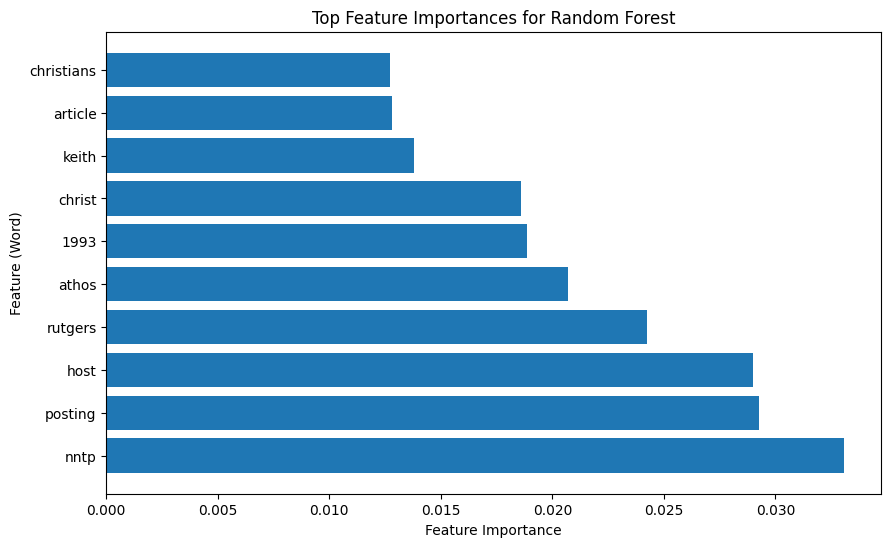

In [ ]:
# Code Cell 3: Random Forest Model Inspection (Feature Importances)
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Dataset & Split Data (Same as before)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Create Random Forest Pipeline (TF-IDF - for inspection)
rf_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('rf', RandomForestClassifier(random_state=42))
])

# 3. Train Pipeline (Same as before)
rf_pipeline_tfidf.fit(X_train, y_train)

# 4. Make Predictions & Evaluate (Same as before)
y_pred_rf_tfidf = rf_pipeline_tfidf.predict(X_test)
print("Random Forest Pipeline with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_rf_tfidf, target_names=target_names))

# 5. Model Inspection - Random Forest Feature Importances
feature_names = rf_pipeline_tfidf.named_steps['tfidf'].get_feature_names_out() # Get feature names
rf_importances = rf_pipeline_tfidf.named_steps['rf'].feature_importances_ # Get feature importances from trained Random Forest

# Sort feature importances and feature names in descending order
feature_importance = sorted(zip(feature_names, rf_importances), key=lambda x: x[1], reverse=True)

print("\nTop 20 Features (Words) for Random Forest (Sorted by Importance):")
for feature, importance in feature_importance[:20]: # Print top 20 features
    print(f"{feature}: {importance:.4f}")

# (Optional) Visualization - Bar plot of top features
top_n = 10 # Visualize top 10 features
top_feature_names = [f[0] for f in feature_importance[:top_n]]
top_importances = [f[1] for f in feature_importance[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names[::-1], top_importances[::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Feature (Word)")
plt.title("Top Feature Importances for Random Forest")
plt.gca().invert_yaxis()
plt.show()

### Explanation of Random Forest Model Inspection - Feature Importances

Let's focus on `Step 5: Model Inspection - Random Forest Feature Importances` in the code:

* `feature_names = rf_pipeline_tfidf.named_steps['tfidf'].get_feature_names_out()`: Gets the vocabulary from the TfidfVectorizer.
* `
rf_importances = rf_pipeline_tfidf.named_steps['rf'].feature_importances_`: This is the key line! It extracts feature importances from the trained `RandomForestClassifier`.
    * Feature Importances in Random Forest: Random Forests provide a measure of how important each feature (word) is for making predictions.
    * Feature importance is calculated based on how much each feature reduces impurity (e.g., Gini impurity or entropy) when used for splitting nodes in the decision trees, averaged across all trees in the forest.
    * Higher feature importance score means the feature is considered more important by the Random Forest model.

The code then sorts the features by their importance scores in descending order and prints the top 20 words.  It also (optionally) creates a bar plot to visualize the top 10 feature importances.

Run the code and examine the "Top 20 Features" output and the bar plot. Do the top words with high importance scores make sense for distinguishing between `alt.atheism` and `soc.religion.christian` articles?  How do these top features compare to the top features you saw for Logistic Regression and Naive Bayes in previous lessons?

Now, let's move on to hyperparameter tuning for Random Forests using GridSearchCV!

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Dataset & Split Data (Same as before)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Create Random Forest Pipeline (TF-IDF)
rf_pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('rf', RandomForestClassifier(random_state=42))
])

# 3. Define Hyperparameter Grid for Random Forest GridSearchCV
param_grid_rf = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], # Tune TF-IDF ngram range
    'rf__n_estimators': [100, 200, 500], # Tune number of trees in the forest
    'rf__max_depth': [None, 10, 20], # Tune maximum depth of trees
    'rf__min_samples_split': [2, 5, 10], # Tune min samples to split a node
    'rf__min_samples_leaf': [1, 2, 4] # Tune min samples in a leaf node
}

# 4. Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline_tfidf, param_grid_rf, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1) # Reduced cv=3 for faster runtime, added verbose=1

# 5. Run GridSearchCV for Random Forest (Fit on training data - longer)
grid_search_rf.fit(X_train, y_train) # This will take longer

# 6. Get Best Model and Best Parameters for Random Forest
best_rf_pipeline = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

print("Best Random Forest Pipeline Parameters from GridSearchCV:")
print(best_params_rf)

# 7. Evaluate Best Random Forest Model on Test Set
y_pred_best_rf = best_rf_pipeline.predict(X_test)
print("\nClassification Report for Best Random Forest Pipeline (on Test Set):")
print(classification_report(y_test, y_pred_best_rf, target_names=target_names))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Random Forest Pipeline Parameters from GridSearchCV:
{'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 500, 'tfidf__ngram_range': (1, 1)}

Classification Report for Best Random Forest Pipeline (on Test Set):
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.94      0.97       235
soc.religion.christian       0.96      1.00      0.98       304

              accuracy                           0.98       539
             macro avg       0.98      0.97      0.98       539
          weighted avg       0.98      0.98      0.98       539



### Explanation of Random Forest Hyperparameter Tuning with GridSearchCV

Let's understand the GridSearchCV code for Random Forest:

*   **Step 3: Define Hyperparameter Grid for Random Forest GridSearchCV:**
    *   `param_grid_rf` defines the hyperparameter grid for the Random Forest pipeline.
    *   We are tuning:
        *   `tfidf__ngram_range`: Trying unigrams and bigrams for TF-IDF.
        *   `rf__n_estimators`:  **`n_estimators`**: Number of trees in the Random Forest.  More trees generally can improve performance, but also increase training time. We're trying `[100, 200, 500]`.
        *   `rf__max_depth`: **`max_depth`**: Maximum depth of each decision tree.  Limits tree depth to prevent overfitting. `None` means no limit. We're trying `[None, 10, 20]`.
        *   `rf__min_samples_split`: **`min_samples_split`**: Minimum number of samples required to split an internal node in a tree.  Controls tree complexity.  We're trying `[2, 5, 10]`.
        *   `rf__min_samples_leaf`: **`min_samples_leaf`**: Minimum number of samples required to be at a leaf node.  Further controls tree complexity and prevents overfitting. We're trying `[1, 2, 4]`.

*   **Step 4: Set up GridSearchCV for Random Forest:** We create `grid_search_rf` using `rf_pipeline_tfidf` and `param_grid_rf`.
    *   `cv=3`: We've reduced cross-validation folds to `cv=3` to speed up the GridSearchCV process, as Random Forest can be slower to train than simpler models.
    *   `verbose=1`: Added `verbose=1` to see some progress output during GridSearchCV, as it can take a while to run.

The rest of the GridSearchCV process is the same: explore the hyperparameter grid, perform cross-validation, find best parameters, evaluate the best model.

Run the Random Forest GridSearchCV code. It will take longer than previous GridSearchCV examples due to the complexity of Random Forests and the larger hyperparameter grid. Examine the "Best Parameters" and the "Classification Report for Best Random Forest Pipeline". Did hyperparameter tuning improve the performance of the Random Forest classifier? What are the best hyperparameters found?

Now, let's move on to experimentation prompts to further explore Random Forests.

### Experimentation Prompts - Random Forest Exploration

Let's dive deeper into experimenting with Random Forests! Try these:

1.  **Datasets and Random Forest Performance:**
    *   Change the `categories` in `fetch_20newsgroups` to different pairs of categories.
    *   For each dataset:
        *   Run GridSearchCV for the Random Forest pipeline (with `param_grid_rf`).
        *   Compare the best performance of Random Forest on different datasets.
        *   How does Random Forest performance vary across different topic pairs? Is it consistently good, or does it excel on some datasets more than others?

2.  **Hyperparameter Tuning - Deeper Grid:**
    *   Expand the hyperparameter grid `param_grid_rf` to include a wider range of values for `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.  For example:
        *   `'rf__n_estimators': [50, 100, 200, 500, 800]`
        *   `'rf__max_depth': [None, 5, 10, 15, 20, 30]`
        *   `'rf__min_samples_split': [2, 3, 4, 5, 10]`
        *   `'rf__min_samples_leaf': [1, 2, 3, 4]`
    *   **Be aware:** A larger grid will significantly increase the GridSearchCV runtime! You might want to start with a smaller grid and gradually expand it if needed.
    *   Does a wider hyperparameter search lead to further performance improvements for Random Forest?

3.  **Feature Importance Analysis - Different Datasets:**
    *   Run the Random Forest model inspection code (feature importance extraction) for different datasets (different `categories` in `fetch_20newsgroups`).
    *   Do the top important words change significantly when you change the topic categories? Are some words consistently important across different datasets?

4.  **Vectorizers and Random Forest - N-grams and Parameters:**
    *   Experiment more systematically with different vectorizers and vectorizer parameters in combination with Random Forest.
    *   Tune `ngram_range`, `max_df`, `min_df`, `max_features` of `TfidfVectorizer` (or `CountVectorizer`) along with Random Forest hyperparameters using GridSearchCV.  Add these vectorizer parameters to your `param_grid_rf`.
    *   What combination of vectorizer and Random Forest hyperparameters gives the best performance?

Think about these questions as you experiment:

*   Is Random Forest performance highly sensitive to hyperparameter tuning? Which hyperparameters are most important to tune?
*   How does the choice of vectorizer interact with Random Forest performance?
*   When is Random Forest a good choice for text classification compared to linear models (Logistic Regression, SVM) or Naive Bayes? What are the trade-offs?

After your experiments, read the summary and key takeaways for this lesson.

### Deeper Dive - Random Forest Concepts

Let's discuss some deeper concepts related to Random Forests:

*   **Ensemble Learning - Wisdom of the Crowd:**
    *   Random Forest is a prime example of **ensemble learning**. Ensemble methods combine multiple "weak" learners (in this case, decision trees) to create a "stronger" learner.
    *   Think of it as the "wisdom of the crowd".  Each individual decision tree might be somewhat noisy or make errors, but by averaging their predictions (majority voting), the Random Forest as a whole becomes more accurate and robust.

*   **Bias-Variance Tradeoff:**
    *   **Decision Trees** can have **low bias** (they can fit complex relationships in the training data) but **high variance** (they are sensitive to small changes in the training data and can overfit).
    *   **Random Forests reduce variance** by averaging predictions from multiple trees trained on different subsets of data and feature subspaces. This leads to better generalization.
    *   By tuning hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`, you are further controlling the bias-variance tradeoff in Random Forests.

*   **Interpretability of Random Forests:**
    *   **Individual Decision Trees** are quite interpretable. You can trace the decision path from the root to a leaf node to understand why a tree made a particular prediction.
    *   **Random Forests (ensembles of trees) are less interpretable than single trees or linear models like Logistic Regression.** It's harder to visualize hundreds or thousands of trees.
    *   **Feature Importance** is a way to get some interpretability from Random Forests. It tells you which features are considered important by the model, but it doesn't give you the same level of detailed understanding as inspecting coefficients in Logistic Regression or probabilities in Naive Bayes.

*   **Computational Cost:**
    *   **Training Random Forests can be more computationally expensive** than training simpler models like Logistic Regression or Naive Bayes, especially if you have a large number of trees (`n_estimators`) or deep trees.
    *   **Prediction time** for Random Forests is also typically longer than for simpler models, as you need to run the input through all trees in the forest.
    *   However, Random Forests are often still reasonably efficient for many text classification tasks, and the performance gains can be worth the extra computational cost.

### Summary and Next Steps - Random Forest Power

Fantastic work exploring Random Forests! In this lesson, you've:

*   Built and understood **Random Forest pipelines** for text classification.
*   Learned about **ensemble learning** and how Random Forests combine decision trees.
*   Explored the **strengths of Random Forests** in reducing overfitting and improving generalization.
*   Experimented with **vectorizers** and **hyperparameter tuning** for Random Forests.
*   Inspected Random Forest models using **feature importances**.

**Key Takeaways for Random Forests:**

*   Random Forests are powerful **ensemble methods** that often achieve high accuracy in text classification.
*   They **reduce overfitting** compared to single decision trees through bagging and random feature subspaces.
*   **Feature importance** provides some interpretability into Random Forest models.
*   **Hyperparameter tuning** (especially `n_estimators`, `max_depth`, and tree complexity parameters) is important to optimize Random Forest performance.
*   Random Forests are often a good choice when you need **robust and accurate text classifiers** and are willing to trade off some interpretability for performance.

**Next Steps:**

In the upcoming lessons, we'll continue to expand our text classification toolkit and move towards more advanced techniques:

*   **Gradient Boosting Machines (GBM)** - another powerful ensemble method.
*   **Neural Networks** for text classification - starting with Feedforward Networks and then Recurrent Neural Networks (RNNs).
*   Even more advanced text representations like **word embeddings** (Word2Vec, GloVe, FastText) and **pre-trained language models** (like BERT).

You are building a strong and versatile skill set in text classification! Keep experimenting and pushing your understanding further!

### Key Takeaways for Lesson #3c (Random Forest Specific):

*   **Random Forest is an ensemble of decision trees, using bagging and random feature subspaces.**
*   **Random Forests reduce overfitting and improve generalization compared to single decision trees.**
*   **Feature importance** is a useful tool for inspecting Random Forest models.
*   **Hyperparameters like `n_estimators`, `max_depth`, and tree complexity parameters are important to tune.**
*   **Random Forests are robust, accurate, and often a good choice for text classification when performance is prioritized.**
*   Experiment with different vectorizers and hyperparameters to optimize Random Forest for your task.

### Resources for Lesson #3c (Random Forest Specific):

*   **Scikit-learn documentation on `RandomForestClassifier`:** [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   **Scikit-learn documentation on Feature Importance in Random Forests:** [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier-feature-importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier-feature-importances_)

### Additional Notes - Random Forest Specific Considerations:

*   **Computational Cost vs. Performance:** Be mindful of the computational cost of training Random Forests, especially with large datasets and extensive hyperparameter tuning.  Experiment with smaller hyperparameter grids initially and increase complexity gradually if needed.

*   **Memory Usage:** Random Forests can consume more memory than simpler models, especially with a large number of trees and deep trees.

*   **Interpretability Trade-off:** While feature importance provides some insight, Random Forests are less interpretable than linear models or single decision trees. If interpretability is a primary concern, consider simpler models or techniques for explaining Random Forest predictions (e.g., SHAP values, LIME - which are more advanced topics).

*   **Out-of-Bag Error:** Random Forests have a built-in way to estimate generalization error without needing a separate validation set, called "out-of-bag (OOB) error".  You can explore the `oob_score=True` parameter in `RandomForestClassifier` to get OOB error estimates.

*   **Feature Scaling:** Unlike some models (like distance-based algorithms or neural networks), Random Forests are generally **not very sensitive to feature scaling**.  You typically don't need to scale TF-IDF or BoW features before using them with Random Forests. However, it's generally good practice to be aware of feature scaling and consider it if you are using models that are sensitive to it.